# **Module 2: Probability Distributions & Interference**

**PHY657 Statistics & Data Analysis**  
February 16, 2026

In [1]:
%matplotlib widget
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('dark_background')
plt.close('all')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "DejaVu Serif",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

### **Activity 1: Empirical verification of the Central Limit Theorem**

Consider $N$ variables $x_1,\cdot,x_N$ each of which has a uniform distribution over the interval [0,1]. Consider the distribution of:
$$
\bar{x}=\frac{1}{N}\sum_{i=1}^N x_i
$$

for $N=1,2,10$. Can you fit the distribution of $\bar{x}$ for N=10 with a Gaussian PDF?  

**For your lab report:**  
review the central limit theorem and its implication in statistics and give examples where the Gaussian PDF is appropriate.

---

In [ ]:
from scipy.stats import norm

# Empirical verification for N=1, 2, 10
sample_size = 10000

means_N1 = [np.mean(np.random.uniform(0, 1, 1)) for _ in range(sample_size)]
means_N2 = [np.mean(np.random.uniform(0, 1, 2)) for _ in range(sample_size)]
means_N10 = [np.mean(np.random.uniform(0, 1, 10)) for _ in range(sample_size)]

plt.figure(figsize=(10,6))
plt.hist(means_N1, bins=50, alpha=0.5, label='N=1')
plt.hist(means_N2, bins=50, alpha=0.5, label='N=2')
plt.hist(means_N10, bins=50, alpha=0.5, label='N=10')
plt.xlabel('Sample Mean $\overline{x}$')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Mean for Different N')
plt.legend()
plt.show()

# Fit N=10 sample means with a Gaussian PDF

mu, std = norm.fit(means_N10)
x = np.linspace(min(means_N10), max(means_N10), 100)
pdf = norm.pdf(x, mu, std)

plt.figure(figsize=(10,6))
plt.hist(means_N10, bins=50, density=True, alpha=0.6, color='g', label='Histogram N=10')
plt.plot(x, pdf, 'r-', lw=2, label=f'Gaussian Fit\n$\mu={mu:.3f}$, $\sigma={std:.3f}$')
plt.xlabel('Sample Mean $\overline{x}$')
plt.ylabel('Probability Density')
plt.title('Gaussian Fit to Sample Mean Distribution (N=10)')
plt.legend()
plt.show()

ValueError: x and y must be the same size

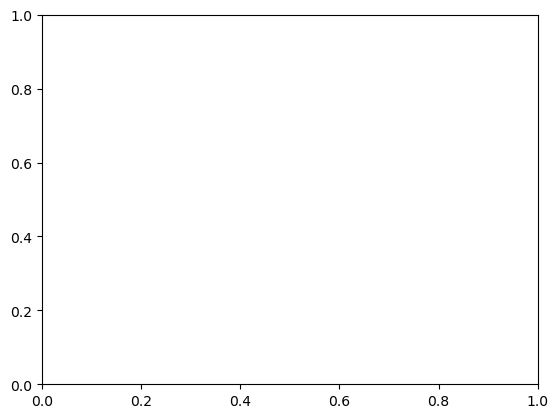

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

np.random.seed(40)

def gen_random_var(N,min, max):
    return np.random.uniform(min, max, N)

def find_mean(data):
    return np.sum(data) / len(data)

N = np.arange(1, 1000, 1)

x_means = []
for n in N:
    X = gen_random_var(n,0,1)
    mean_x = find_mean(X)
    x_means.append(mean_x)


loc = np.mean(x_means)
gaus_data = np.random.normal(loc=loc, scale=0.5, size=1000)

plt.scatter(gaus_data, len(gaus_data), alpha=0.5) 
plt.scatter(x_means, N)
plt.ylabel('Number of samples N')
plt.xlabel('Sample mean')
plt.title('Sample Mean to Expected Value')
plt.grid()
plt.show()


## Seems lke the mean is about 0.5, with var = 0.05



### **Activity 2: Poisson distribution (mean & variance)**

Consider a Poisson process with rate parameter $\lambda$. The probability of observing $k$ events in a fixed interval is given by the Poisson distribution. 

---

1. **Write the Poisson probability mass function $p(k|\lambda)$**
2. **Compute the expectation value $\langle k \rangle$.**
3. **Compute the variance $\text{Var}(k)$.**
4. **Show explicitly that $\text{Var}(k)=\langle k \rangle$.**
5. **Briefly discuss the physical meaninig of this result for counting experiments.**

### **Activity 3: Practice with multi-dimensional Gaussian distributions**

1. **Generate 1000 events characterized by coordinates $(x_i,y_i)$ that are random variates distributed to a 2D Gaussian PDF with mean $[0,0]$ and covariance matrix**

\begin{align}
\Sigma=
\begin{pmatrix}
    4 & 2 \\
    2 & 16
\end{pmatrix}
\end{align}

---

2. **Produce a scatter plot of this distribution and draw the contours of constant probability density. Can you give and example of a pair of observables that exhibit such a correlation?**